In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re
plt.style.use('ggplot')

- df.head()
- df.sample()
- df.sample().sort_index()
- df.nunique()
- df.shape
- df.columns.tolist()
- df.dtype
- df.dtypes
- df.isna().sum()

# Clean up of Combined Dataset

In [7]:
# Pull in data from the combined dataset 
gs_income = pd.read_csv('gs_income.csv')

In [8]:
gs_income.dtypes

Unnamed: 0                    int64
school                       object
rating                        int64
type                         object
students                     object
grades                       object
city                         object
zip                           int64
state                        object
zipcode                     float64
returns                     float64
single_returns              float64
joint_returns               float64
hoh_returns                 float64
agi                         float64
total_income                float64
educator_expense_amount     float64
returns_itemized            float64
charitable_contributions    float64
dtype: object

In [9]:
x = []
for i in gs_income['students']:
    x.append(i)
x
# gs_income.students = x

['1,165',
 '558',
 '315',
 '489',
 '170',
 '429',
 '771',
 '1,124',
 '292',
 '461',
 '418',
 '347',
 '171',
 '754',
 '331',
 '1,380',
 '2,997',
 '5,839',
 '300',
 '688',
 '393',
 '679',
 '488',
 '1,132',
 '851',
 '611',
 '1,133',
 '326',
 '1,514',
 '566',
 '379',
 '912',
 '188',
 '1,335',
 '590',
 '589',
 '513',
 '384',
 '590',
 '996',
 '1,584',
 '936',
 '327',
 '1,458',
 '626',
 '1,417',
 '3,334',
 '1,532',
 '1,583',
 '432',
 '642',
 '1,144',
 '317',
 '522',
 '1,017',
 '738',
 '498',
 '494',
 '756',
 '369',
 '391',
 '1,517',
 '346',
 '442',
 '620',
 '541',
 '450',
 '394',
 '456',
 '262',
 '357',
 '387',
 '449',
 '496',
 '1,320',
 '538',
 '668',
 '139',
 '399',
 '474',
 '524',
 '569',
 '396',
 '576',
 '681',
 '320',
 '500',
 '822',
 '539',
 '460',
 '755',
 '789',
 '546',
 '329',
 '397',
 '342',
 '475',
 '384',
 '481',
 '314',
 '529',
 '494',
 '517',
 '524',
 '424',
 '505',
 '413',
 '710',
 '393',
 '574',
 '660',
 '484',
 '931',
 '568',
 '661',
 '1,134',
 '781',
 '746',
 '292',
 '1,725'

In [10]:
x = pd.Series(x)
x = x.str.replace(',', '')
x = x.astype(int)
gs_income['students'] = x

In [11]:
gs_income.dtypes

Unnamed: 0                    int64
school                       object
rating                        int64
type                         object
students                      int64
grades                       object
city                         object
zip                           int64
state                        object
zipcode                     float64
returns                     float64
single_returns              float64
joint_returns               float64
hoh_returns                 float64
agi                         float64
total_income                float64
educator_expense_amount     float64
returns_itemized            float64
charitable_contributions    float64
dtype: object

In [12]:
# Added columns to represent % single vs joint returns
# Acts as a proxy for students in single or dual parent households
gs_income['per_single']=gs_income['single_returns']/gs_income['returns']
gs_income['per_joint']=gs_income['joint_returns']/gs_income['returns']

# Added columns to represent average income and agi per each tax return by county
gs_income['income_per_return'] = gs_income['total_income']/gs_income['returns']
gs_income['agi_per_return'] = gs_income['agi']/gs_income['returns']

# Dropped unneeded columns
gs_income = gs_income.drop(['Unnamed: 0', 'zipcode', 'hoh_returns',  'educator_expense_amount', 'charitable_contributions'],axis=1)
gs_income.head()

,school,rating,type,students,grades,city,zip,state,returns,single_returns,joint_returns,agi,total_income,returns_itemized,per_single,per_joint,income_per_return,agi_per_return
0,Garden City High School,10,Public district,1165,9-12,Garden City,11530,NY,14650.0,6910.0,6760.0,3809585.0,3866878.0,9500.0,0.471672,0.461433,263.950717,260.039932
1,Saddle Rock School,10,Public district,558,K-5,Great Neck,11023,NY,4090.0,1710.0,2050.0,804629.0,821801.0,2530.0,0.418093,0.501222,200.929340,196.730807
2,Purchase School,10,Public district,315,K-5,Harrison,10577,NY,1550.0,760.0,670.0,1529377.0,1542695.0,920.0,0.490323,0.432258,995.287097,986.694839
3,Center Street School,10,Public district,489,K-5,Williston Park,11596,NY,5470.0,2570.0,2450.0,693248.0,704030.0,3120.0,0.469835,0.447898,128.707495,126.736380
4,Briarwood School,10,Public district,170,K-3,Irondequoit,14617,NY,12300.0,6200.0,4590.0,782001.0,793421.0,5030.0,0.504065,0.373171,64.505772,63.577317


### Adding demographic info to gs_income

In [47]:
zip_demo = pd.read_csv('nys_zip_codes.csv')
zip_demo

,Your Entry,City,State,Population,Population Estimate,Business Annual Payroll,Business First Quarter Payroll,Median Age,Male Population,Female Population,...,Black or African American Population,American Indian or Alaskan Native Population,Native Hawaiian or other Pacific Islander Population,White Population,Other Population,Growing Counties A,Growing Counties B,Growth Increase Number,Growth Increase Percentage,Growth Rank
0,00zip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,NEW YORK,NY,21102.0,28896.0,9003675.0,2238126.0,35.4,10184.0,10918.0,...,2227.0,191.0,36.0,14351.0,1315.0,0.0,0.0,0.0,0.0,0.0
2,10002,NEW YORK,NY,81410.0,89677.0,723242.0,164606.0,39.7,38570.0,42840.0,...,7851.0,876.0,172.0,27453.0,9176.0,0.0,0.0,0.0,0.0,0.0
3,10003,NEW YORK,NY,56024.0,49344.0,6918342.0,1685926.0,31.9,26750.0,29274.0,...,2430.0,329.0,103.0,44362.0,1569.0,0.0,0.0,0.0,0.0,0.0
4,10004,NEW YORK,NY,3089.0,4249.0,5638373.0,1687946.0,32.3,1610.0,1479.0,...,131.0,15.0,4.0,2264.0,63.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,14897,WHITESVILLE,NY,980.0,639.0,739.0,163.0,37.7,498.0,482.0,...,4.0,9.0,0.0,971.0,1.0,0.0,0.0,0.0,0.0,0.0
1035,14901,ELMIRA,NY,16736.0,13453.0,321781.0,79932.0,34.3,8816.0,7920.0,...,3659.0,209.0,8.0,13251.0,283.0,0.0,0.0,0.0,0.0,0.0
1036,14903,ELMIRA,NY,7567.0,7714.0,193460.0,46539.0,41.6,3690.0,3877.0,...,214.0,36.0,4.0,7283.0,40.0,0.0,0.0,0.0,0.0,0.0
1037,14904,ELMIRA,NY,16269.0,15747.0,54704.0,12767.0,36.8,7826.0,8443.0,...,1490.0,216.0,26.0,15003.0,129.0,0.0,0.0,0.0,0.0,0.0


In [48]:
zip_demo.columns.to_list()

['Your Entry',
 'City',
 'State',
 'Population',
 'Population Estimate',
 'Business Annual Payroll',
 'Business First Quarter Payroll',
 'Median Age',
 'Male Population',
 'Female Population',
 'Median Age Female',
 'Median Age Male',
 'Households',
 'Persons Per Household',
 'Income Per Household',
 'Number of Businesses',
 'Number of Employees',
 'Delivery Business',
 'Delivery Residential',
 'Delivery Total',
 'Average House Value',
 'CBSA Population',
 'CBSA Division Population',
 'CBSA Name',
 'CBSA Number',
 'CBSA Type',
 'City Alias Name',
 'State Full Name',
 'State FIPS',
 'County Name',
 'County FIPS',
 'Latitude',
 'Longitude',
 'Region',
 'Division',
 'Area Code',
 'DayLight Savings',
 'Land Area',
 'Water Area',
 'Congressional District',
 'Congressional Land Area',
 'Asian Population',
 'Black or African American Population',
 'American Indian or Alaskan Native Population',
 'Native Hawaiian or other Pacific Islander Population',
 'White Population',
 'Other Population',


In [64]:
zip_demo_2 = zip_demo[['Your Entry','Population','Business Annual Payroll','Median Age','Households','Income Per Household',\
          'Asian Population','Black or African American Population',\
          'White Population']]

zip_demo_2.columns = ['zip_demo','population','annual_business_payroll','median_age','households',\
                     'income_per_household','asian','african_american','white']
zip_demo_2.head()

,zip_demo,population,annual_business_payroll,median_age,households,income_per_household,asian,african_american,white
0,00zip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,21102.0,9003675.0,35.4,11031.0,85221.0,3843.0,2227.0,14351.0
2,10002,81410.0,723242.0,39.7,32925.0,35449.0,38893.0,7851.0,27453.0
3,10003,56024.0,6918342.0,31.9,28559.0,104441.0,9180.0,2430.0,44362.0
4,10004,3089.0,5638373.0,32.3,1692.0,140450.0,732.0,131.0,2264.0


In [65]:
zip_demo_2 = zip_demo_2.drop(0)

In [66]:
zip_demo_2.head()

,zip_demo,population,annual_business_payroll,median_age,households,income_per_household,asian,african_american,white
1,10001,21102.0,9003675.0,35.4,11031.0,85221.0,3843.0,2227.0,14351.0
2,10002,81410.0,723242.0,39.7,32925.0,35449.0,38893.0,7851.0,27453.0
3,10003,56024.0,6918342.0,31.9,28559.0,104441.0,9180.0,2430.0,44362.0
4,10004,3089.0,5638373.0,32.3,1692.0,140450.0,732.0,131.0,2264.0
5,10006,3011.0,2322344.0,29.2,1791.0,145893.0,648.0,167.0,2165.0


In [67]:
# Added columns to represent % of population group by race
zip_demo_2['per_asian'] = zip_demo_2['asian']/zip_demo_2['population']
zip_demo_2['per_african_american'] = zip_demo_2['african_american']/zip_demo_2['population']
zip_demo_2['per_white'] = zip_demo_2['white']/zip_demo_2['population']
zip_demo_2['per_non_white'] = (zip_demo_2['population']-zip_demo_2['white'])/zip_demo_2['population']
zip_demo_2.head()

,zip_demo,population,annual_business_payroll,median_age,households,income_per_household,asian,african_american,white,per_asian,per_african_american,per_white,per_non_white
1,10001,21102.0,9003675.0,35.4,11031.0,85221.0,3843.0,2227.0,14351.0,0.182115,0.105535,0.680078,0.319922
2,10002,81410.0,723242.0,39.7,32925.0,35449.0,38893.0,7851.0,27453.0,0.477742,0.096438,0.337219,0.662781
3,10003,56024.0,6918342.0,31.9,28559.0,104441.0,9180.0,2430.0,44362.0,0.163858,0.043374,0.791839,0.208161
4,10004,3089.0,5638373.0,32.3,1692.0,140450.0,732.0,131.0,2264.0,0.236970,0.042409,0.732923,0.267077
5,10006,3011.0,2322344.0,29.2,1791.0,145893.0,648.0,167.0,2165.0,0.215211,0.055463,0.719030,0.280970


In [70]:
zip_demo_2.dtypes

zip_demo                    object
population                 float64
annual_business_payroll    float64
median_age                 float64
households                 float64
income_per_household       float64
asian                      float64
african_american           float64
white                      float64
per_asian                  float64
per_african_american       float64
per_white                  float64
per_non_white              float64
dtype: object

In [72]:
zip_demo_2['zip_demo'] = zip_demo_2['zip_demo'].astype(int)

In [79]:
gs_income_demo = pd.merge(gs_income, zip_demo_2, how='left', left_on='zip', right_on='zip_demo').drop(['zip_demo'], axis=1)
gs_income_demo

,school,rating,type,students,grades,city,zip,state,returns,single_returns,...,median_age,households,income_per_household,asian,african_american,white,per_asian,per_african_american,per_white,per_non_white
0,Garden City High School,10,Public district,1165,9-12,Garden City,11530,NY,14650.0,6910.0,...,42.3,9111.0,151809.0,1184.0,524.0,25489.0,0.043413,0.019213,0.934587,0.065413
1,Saddle Rock School,10,Public district,558,K-5,Great Neck,11023,NY,4090.0,1710.0,...,42.7,3130.0,111607.0,892.0,115.0,8171.0,0.098815,0.012740,0.905173,0.094827
2,Purchase School,10,Public district,315,K-5,Harrison,10577,NY,1550.0,760.0,...,20.9,776.0,213173.0,656.0,538.0,5263.0,0.100122,0.082112,0.803266,0.196734
3,Center Street School,10,Public district,489,K-5,Williston Park,11596,NY,5470.0,2570.0,...,42.9,3676.0,116250.0,1483.0,98.0,8876.0,0.141508,0.009351,0.846947,0.153053
4,Briarwood School,10,Public district,170,K-3,Irondequoit,14617,NY,12300.0,6200.0,...,43.9,9502.0,64589.0,390.0,1064.0,21312.0,0.017114,0.046689,0.935188,0.064812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4346,Ps 84,1,Public district,199,Ungraded,Buffalo,14215,NY,16760.0,8480.0,...,31.5,15778.0,35160.0,682.0,33009.0,6412.0,0.017050,0.825246,0.160304,0.839696
4347,Riverside Institute Of Technology,1,Public district,224,10-12,Buffalo,14207,NY,9810.0,5030.0,...,31.7,9631.0,26448.0,1247.0,4411.0,16225.0,0.052947,0.187288,0.688901,0.311099
4348,Mount Pleasant Cottage School,1,Public district,120,1-12,Pleasantville,10570,NY,6050.0,2740.0,...,40.1,4201.0,132601.0,786.0,522.0,11153.0,0.061987,0.041167,0.879574,0.120426
4349,Greenburgh Eleven High School,1,Public district,80,9-12,Dobbs Ferry,10522,NY,5390.0,2480.0,...,41.4,3901.0,126988.0,1055.0,887.0,8775.0,0.097011,0.081563,0.806897,0.193103


# Simple Graphs

### Number of Students in Schools by Rating

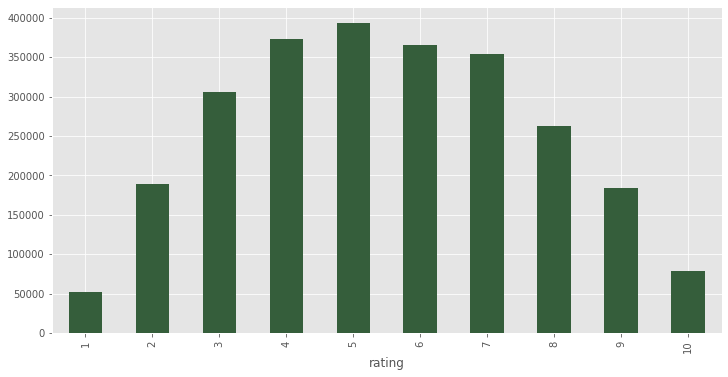

In [80]:
plt.figure(figsize=(12,6))
gs_income_demo.groupby('rating')['students'].sum().plot.bar(color='#355e3b')

### Number of Schools by Rating

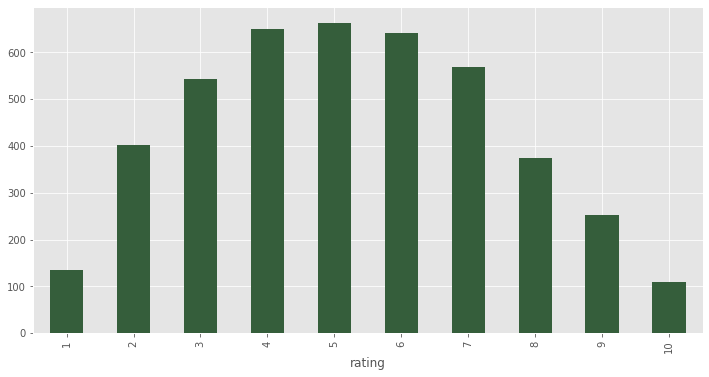

In [81]:
plt.figure(figsize=(12,6))
gs_income_demo.groupby('rating')['school'].nunique().plot.bar(color='#355e3b')

(array([134., 404., 544., 654., 665., 642., 571., 375., 252., 110.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

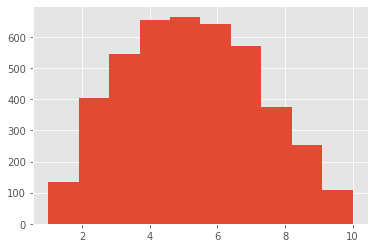

In [162]:
plt.hist(gs_income_demo['rating'])

### AGI Distributions by School Rating

Text(0, 0.5, 'AGI')

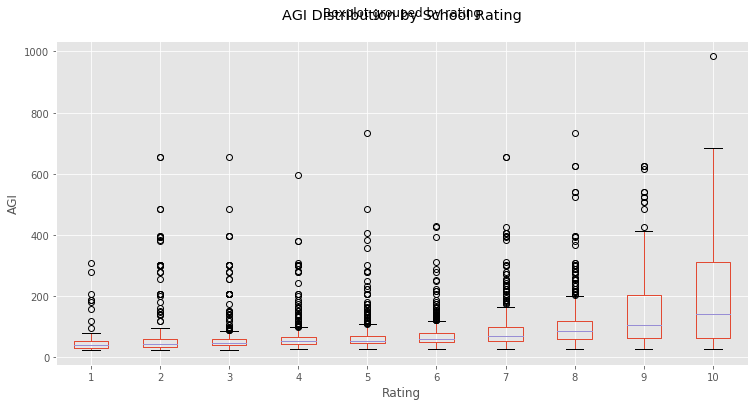

In [82]:
gs_income_demo.boxplot(by='rating', column='agi_per_return',figsize=(12,6))
plt.title('AGI Distribution by School Rating\n')
plt.xlabel('Rating')
plt.ylabel('AGI')

### AGI Distributions by School Rating w/o Outliers

Text(0, 0.5, 'AGI')

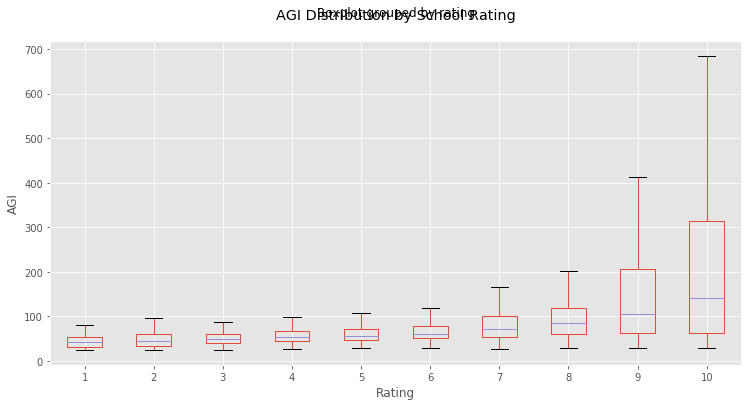

In [83]:
gs_income_demo.boxplot(by='rating', column='agi_per_return', showfliers=False, figsize=(12,6))
plt.title('AGI Distribution by School Rating\n')
plt.xlabel('Rating')
plt.ylabel('AGI')

### AGI Distributions by School Rating

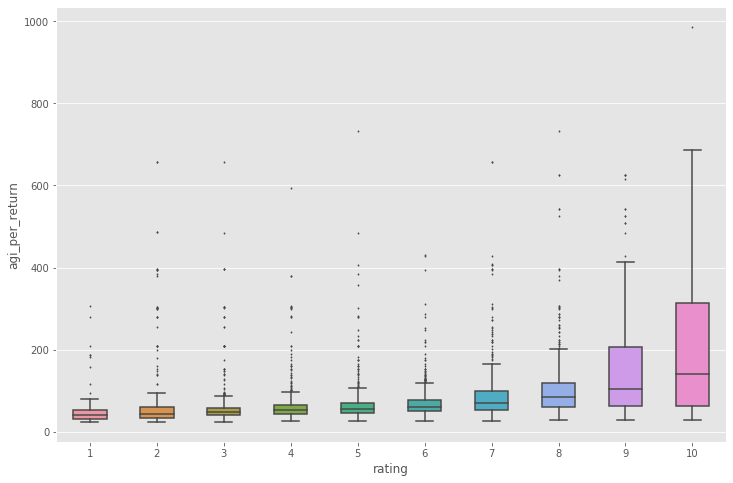

In [85]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['agi_per_return'],
            fliersize=1, width=.5, showfliers=True)

### AGI Distributions by School Rating w/o Outliers

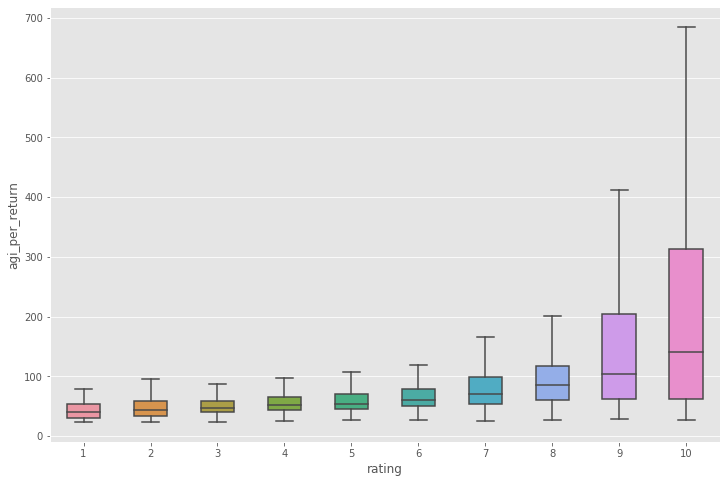

In [86]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['agi_per_return'],
            fliersize=1, width=.5, showfliers=False)

### AGI Distributions by School Rating by Distric or Charter

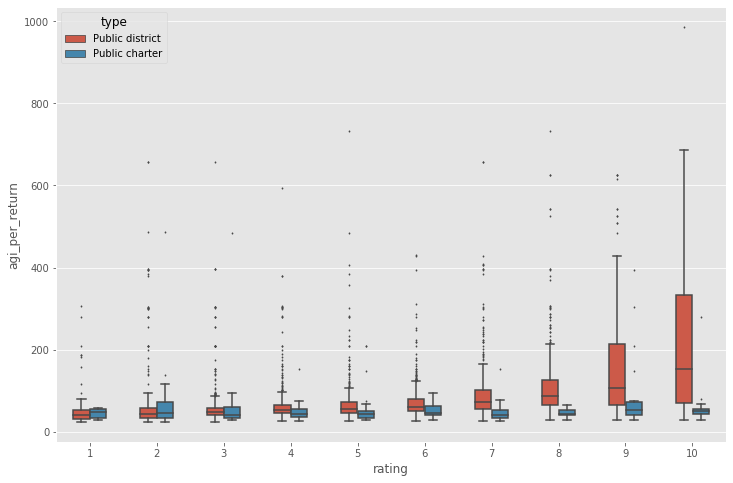

In [87]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['agi_per_return'], hue=gs_income_demo['type'],
            fliersize=1, width=.5)

### AGI Distributions by School Rating by Distric or Charter w/o Outliers

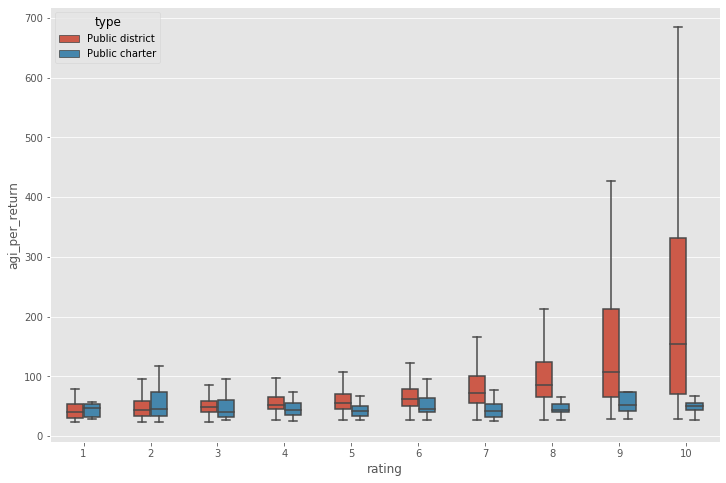

In [88]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['agi_per_return'], hue=gs_income_demo['type'],
            fliersize=1, width=.5, showfliers=False)

### Household Income Distributions by School Rating by Distric or Charter

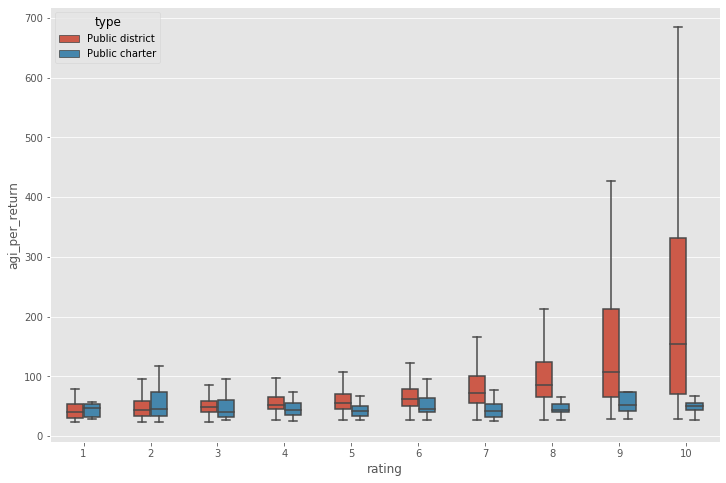

In [167]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['agi_per_return'], hue=gs_income_demo['type'],
            fliersize=1, width=.5, showfliers=False)

### Distribution of Joint Filings by School Rating

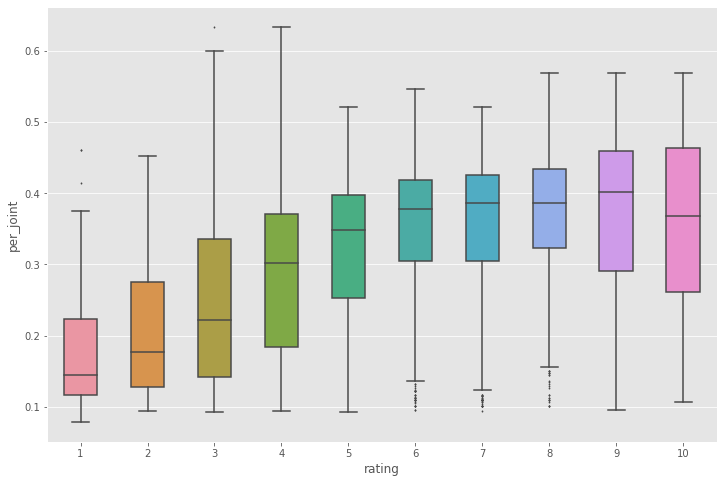

In [89]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['per_joint'],
            fliersize=1, width=.5)

### Distribution of Single Filings by School Rating

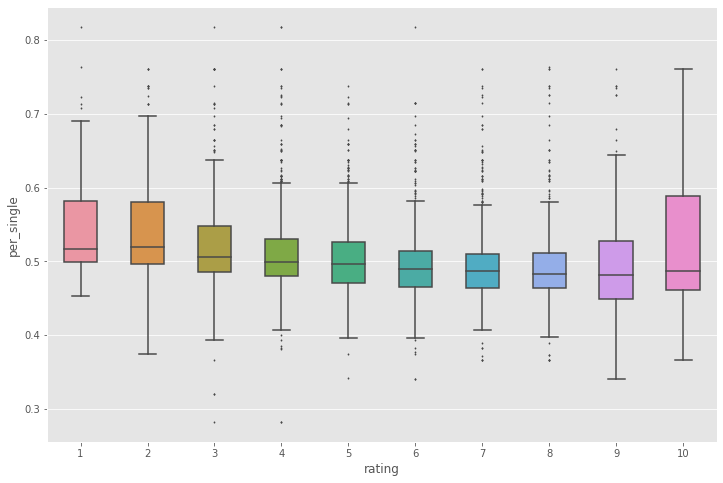

In [90]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['per_single'],
            fliersize=1, width=.5)

### Distribution of School Ratings by % of Pop African American

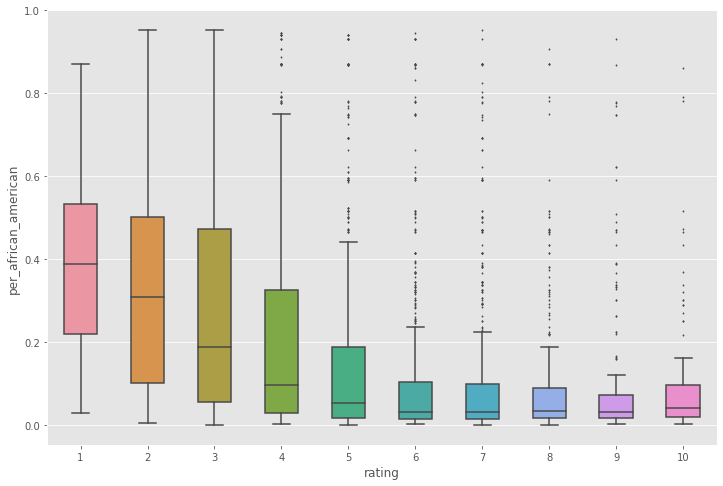

In [91]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['per_african_american'],
            fliersize=1, width=.5)

### Distribution of School Ratings by % of Pop African American, District vs Charter

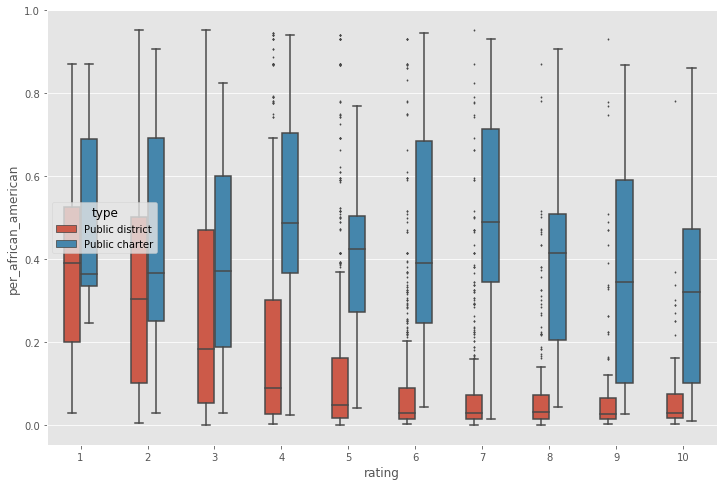

In [95]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['per_african_american'],\
            hue=gs_income_demo['type'], fliersize=1, width=.5)

### Distribution of School Ratings by % of Pop White

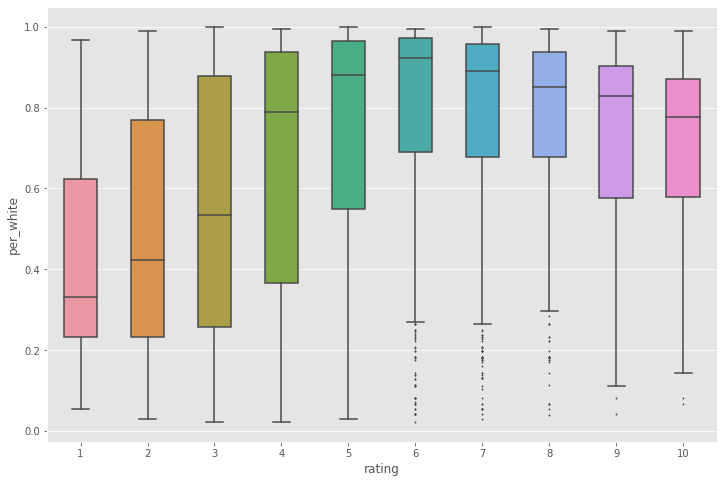

In [97]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['per_white'],
            fliersize=1, width=.5)

### Distribution of School Ratings by % of Pop White, District vs Charter

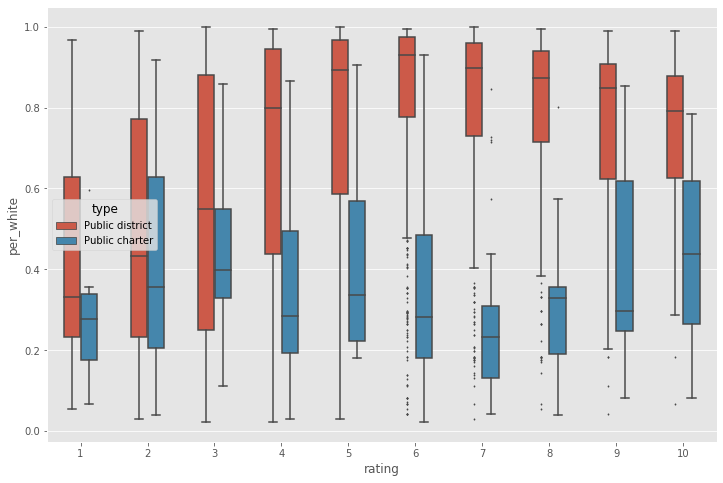

In [98]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['per_white'],\
            hue=gs_income_demo['type'], fliersize=1, width=.5)

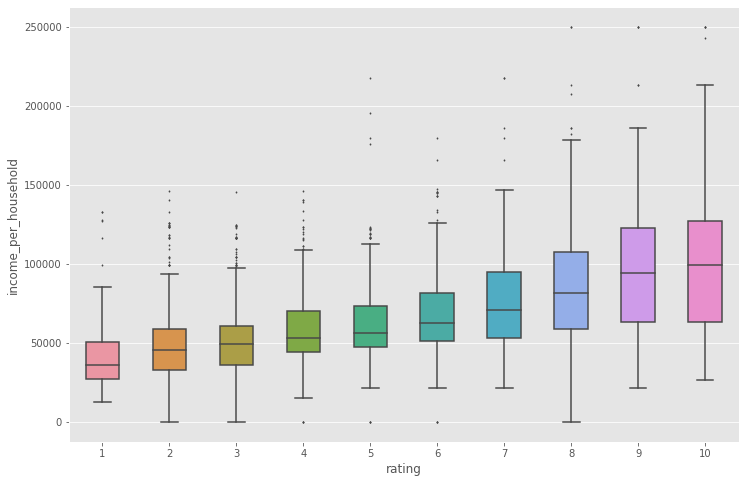

In [100]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['income_per_household'],
            fliersize=1, width=.5)

## Attempt at Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [104]:
gs_income_demo.dtypes

school                      object
rating                       int64
type                        object
students                     int64
grades                      object
city                        object
zip                          int64
state                       object
returns                    float64
single_returns             float64
joint_returns              float64
agi                        float64
total_income               float64
returns_itemized           float64
per_single                 float64
per_joint                  float64
income_per_return          float64
agi_per_return             float64
population                 float64
annual_business_payroll    float64
median_age                 float64
households                 float64
income_per_household       float64
asian                      float64
african_american           float64
white                      float64
per_asian                  float64
per_african_american       float64
per_white           

In [122]:
# Adding row to show boolean of whether or not the school is a charter
gs_income_demo['is_charter'] = gs_income_demo['type'] == 'Public charter'

In [123]:
# Created a df containing variables for a basic linear regression
gs_income_demo_lr = gs_income_demo.drop(['school','type','grades','city','state',\
                               'returns','single_returns','joint_returns',\
                               'agi','total_income','returns_itemized','asian','african_american','white'],\
                              axis=1)
gs_income_demo_lr

,rating,students,zip,per_single,per_joint,income_per_return,agi_per_return,population,annual_business_payroll,median_age,households,income_per_household,per_asian,per_african_american,per_white,per_non_white,is_charter
0,10,1165,11530,0.471672,0.461433,263.950717,260.039932,27273.0,1982085.0,42.3,9111.0,151809.0,0.043413,0.019213,0.934587,0.065413,False
1,10,558,11023,0.418093,0.501222,200.929340,196.730807,9027.0,96484.0,42.7,3130.0,111607.0,0.098815,0.012740,0.905173,0.094827,False
2,10,315,10577,0.490323,0.432258,995.287097,986.694839,6552.0,2390579.0,20.9,776.0,213173.0,0.100122,0.082112,0.803266,0.196734,False
3,10,489,11596,0.469835,0.447898,128.707495,126.736380,10480.0,96692.0,42.9,3676.0,116250.0,0.141508,0.009351,0.846947,0.153053,False
4,10,170,14617,0.504065,0.373171,64.505772,63.577317,22789.0,87257.0,43.9,9502.0,64589.0,0.017114,0.046689,0.935188,0.064812,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4346,1,199,14215,0.505967,0.140215,31.836754,31.632637,39999.0,541086.0,31.5,15778.0,35160.0,0.017050,0.825246,0.160304,0.839696,False
4347,1,224,14207,0.512742,0.220183,28.387462,28.164628,23552.0,507274.0,31.7,9631.0,26448.0,0.052947,0.187288,0.688901,0.311099,False
4348,1,120,10570,0.452893,0.461157,191.763471,187.798678,12680.0,223979.0,40.1,4201.0,132601.0,0.061987,0.041167,0.879574,0.120426,False
4349,1,80,10522,0.460111,0.413729,160.707607,157.624490,10875.0,190171.0,41.4,3901.0,126988.0,0.097011,0.081563,0.806897,0.193103,False


### PEARSON correlations between rating and other variables

In [124]:
corr_pearson = gs_income_demo_lr.corr(method='pearson')['rating'][:-1].sort_values(ascending=False)
print(corr_pearson)

rating                     1.000000
income_per_household       0.451477
per_joint                  0.451436
median_age                 0.321336
income_per_return          0.320401
agi_per_return             0.319583
per_white                  0.294155
per_asian                  0.208656
students                   0.161474
annual_business_payroll    0.003114
zip                       -0.034384
households                -0.110228
population                -0.123344
per_single                -0.182915
per_non_white             -0.294155
per_african_american      -0.348602
Name: rating, dtype: float64


### KENDALL correlations between rating and other variables

In [125]:
corr_kendall = gs_income_demo_lr.corr(method='kendall')['rating'][:-1].sort_values(ascending=False)
print(corr_kendall)

rating                     1.000000
per_joint                  0.345710
income_per_return          0.334244
agi_per_return             0.334044
income_per_household       0.332494
median_age                 0.252693
per_white                  0.181983
students                   0.151063
per_asian                  0.131097
zip                        0.001590
annual_business_payroll   -0.001414
households                -0.086400
population                -0.086537
per_non_white             -0.181983
per_single                -0.186223
per_african_american      -0.273104
Name: rating, dtype: float64


### Linear Regression:  Income per Return and Ratings

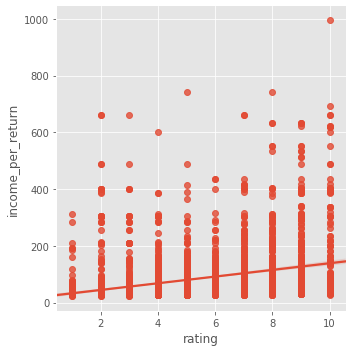

In [143]:
sns.lmplot("rating", "income_per_return", gs_income_demo_lr)

In [ ]:
sns.lmplot("rating", "income_per_return", gs_income_demo_lr)

In [ ]:
# First, convert the data to numpy arrays
# Select your variables using .iloc[:,'column_name']
X = gs_income_lr.iloc[:,0].values.reshape(-1, 1)
Y = gs_income_lr.iloc[:,1].values.reshape(-1, 1)


# Call a linear regression object
lr = LinearRegression()
lr.fit(X,Y)

# The prediction for var y = a linear regression on var x
Y_pred = lr.predict(X)

# Create the visual for the regression
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [294]:
# # Convert column per_single from a float to an int
# a = []
# for i in gs_income_lr['per_single']:
#     a.append(i)
# a = pd.Series(a)
# a = a.dropna().astype(int)
# a = a.dropna().astype('Int64')
# gs_income_lr['per_single'] = a

# # Convert column per_joint from a float to an int
# b = []
# for i in gs_income_lr['per_joint']:
#     b.append(i)
# b = pd.Series(b)
# b = b.dropna().astype(int)
# b = b.dropna().astype('Int64')
# gs_income_lr['per_joint'] = b

# # Convert column income_per_return from a float to an int
# c = []
# for i in gs_income_lr['income_per_return']:
#     c.append(i)
# c = pd.Series(c)
# c = c.dropna().astype(int)
# c = c.dropna().astype('Int64')
# gs_income_lr['income_per_return'] = c

# # Convert column agi_per_return from a float to an int
# d = []
# for i in gs_income_lr['agi_per_return']:
#     d.append(i)
# d = pd.Series(d)
# d = d.dropna().astype(int)
# d = d.dropna().astype('Int64')
# gs_income_lr['agi_per_return'] = d

# gs_income_lr.dtypes